#Table of contents
##Titanic dataset 
Part 1:
  * EDA
  * Data Preprocessing 
-------------------------------------------------------------
Part 2:
  * Feature Extraction
  * ML Models
    * KNN classifier
    * Naive Bayes Classifier
    * Recap on Logistic Regression, DT and SVM

About The Dataset:
* PassengerId: Passenger Identification Number

* Survived: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target

* Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

* Name: A field rich in information as it contains title and family names

* Sex: male/female

* Age: Age, asignificant portion of values aremissing

* SibSp: Number of siblings/spouses aboard

* Parch: Number of parents/children aboard

* Ticket: Ticket number.

* Fare: Passenger fare (British Pound).

* Cabin: Does the location of the cabin influence chances of survival?

* Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#Example: Titanic dataset

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

#Training data
from sklearn.model_selection import train_test_split

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

##Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Load Dataset

In [3]:
data_titanic_train = pd.read_csv('/content/drive/My Drive/titanic_train.csv')
data_titanic_test = pd.read_csv('/content/drive/My Drive/titanic_test.csv')

##Inspecting data

In [4]:
data_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data_titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##Exploring Data
1. What percentage of male and female survived the tragic event (visualise it using a bar plot)
2. How many percent of each type of class survived the tragic event (visualise it using a bar plot)
3. Visualise the SibSp Feature using bar plot
4. Visualise the Parch feature using bar plot
5. Which age group is most likely to survive the tragic event
6. What percentage of cabin numbers that were recorded

###I. Percentage of male and female who survived the tragic event

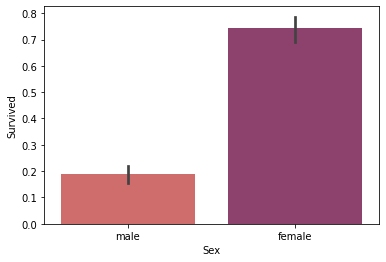

In [8]:
#Draw a bar plot of the survival using the gender as a factor 
sns.barplot(x='Sex', y='Survived', data=data_titanic_train, palette='flare')

In [9]:
#Printing the percentage of females who survived
females_survived = data_titanic_train['Survived'][data_titanic_train['Sex']=='female'].value_counts(normalize=True)[1]
females_survived = round(females_survived,2)
print('Survival rate of females', females_survived)

Survival rate of females 0.74


In [10]:
#Printing the percentage of males who survived
males_survived = data_titanic_train['Survived'][data_titanic_train['Sex']=='male'].value_counts(normalize=True)[1]
males_survived = round(males_survived,2)
print('Survival rate of males', males_survived)

Survival rate of males 0.19


In [11]:
if(males_survived > females_survived):
  print('There is a higher possiblity for males to survive than females')
else:
  print('There is a higher possiblity for females to survive than males')

There is a higher possiblity for females to survive than males


###II. How many percent of each type of class survived the tragic event (visualise it using a bar plot)

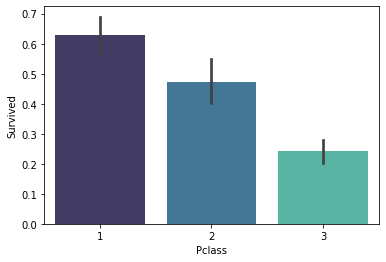

In [12]:
# Draw a bar plot of the survival using the Pclass as a factor
sns.barplot(x='Pclass', y='Survived', data = data_titanic_train, palette='mako')

In [13]:
#Printing the percentage of Pclass 1 that survived
class1_survived = data_titanic_train['Survived'][data_titanic_train['Pclass']==1].value_counts(normalize=True)[1]
class1_survived = round(class1_survived, 2)
print('Survival rate of Pclass:1 is', class1_survived)

Survival rate of Pclass:1 is 0.63


In [14]:
#Printing the percentage of Pclass 2 that survived
class2_survived = data_titanic_train['Survived'][data_titanic_train['Pclass']==2].value_counts(normalize=True)[1]
class2_survived = round(class2_survived, 2)
print('Survival rate of Pclass:2 is', class2_survived)

Survival rate of Pclass:2 is 0.47


In [15]:
#Printing the percentage of Pclass 3 that survived
class3_survived = data_titanic_train['Survived'][data_titanic_train['Pclass']==3].value_counts(normalize=True)[1]
class3_survived = round(class3_survived, 2)
print('Survival rate of Pclass:3 is', class3_survived)

Survival rate of Pclass:3 is 0.24


As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

###III. Visualise the SibSp Feature using bar plot

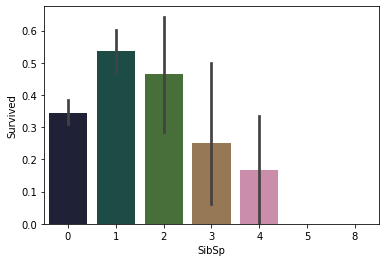

In [16]:
# Draw a bar plot of the survival using the SibSp as a factor
sns.barplot(x='SibSp', y='Survived', data = data_titanic_train, palette='cubehelix')

In [17]:
#Printing the percentage of SibSp = 0 that survived
SibSp0_survived = data_titanic_train['Survived'][data_titanic_train['SibSp']==0].value_counts(normalize=True)[1]
SibSp0_survived = round(SibSp0_survived, 2)
print('Survival rate of SibSp: 0 is', SibSp0_survived)

Survival rate of SibSp: 0 is 0.35


In [18]:
#Printing the percentage of SibSp = 1 that survived
SibSp1_survived = data_titanic_train['Survived'][data_titanic_train['SibSp']==1].value_counts(normalize=True)[1]
SibSp1_survived = round(SibSp1_survived, 2)
print('Survival rate of SibSp: 1 is', SibSp1_survived)

Survival rate of SibSp: 1 is 0.54


In [19]:
#Printing the percentage of SibSp = 2 that survived
SibSp2_survived = data_titanic_train['Survived'][data_titanic_train['SibSp']==2].value_counts(normalize=True)[1]
SibSp2_survived = round(SibSp2_survived, 2)
print('Survival rate of SibSp: 2 is', SibSp2_survived)

Survival rate of SibSp: 2 is 0.46


In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

###IV.Visualise the Parch feature using bar plot

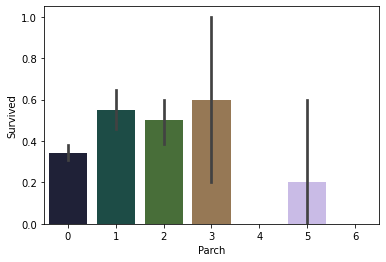

In [20]:
# Draw a bar plot of the survival using the Parch feature as a factor
sns.barplot(x='Parch', y='Survived', data = data_titanic_train, palette='cubehelix')

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

###V. Which age group is most likely to survive the tragic event

In [21]:
# Sort the ages into logical categories
# Filling na values with -0.5 so that later in the categorisation they will be categorised as the Unknown factor
data_titanic_train["Age"] = data_titanic_train["Age"].fillna(-0.5)
data_titanic_test["Age"] = data_titanic_test["Age"].fillna(-0.5)
#Setting the range for each age category
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
#Labelling the age categories used 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
#Segmenting and sorting data values into bins
data_titanic_train['AgeGroup'] = pd.cut(data_titanic_train["Age"], bins, labels = labels)
data_titanic_test['AgeGroup'] = pd.cut(data_titanic_test["Age"], bins, labels = labels)

In [22]:
data_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


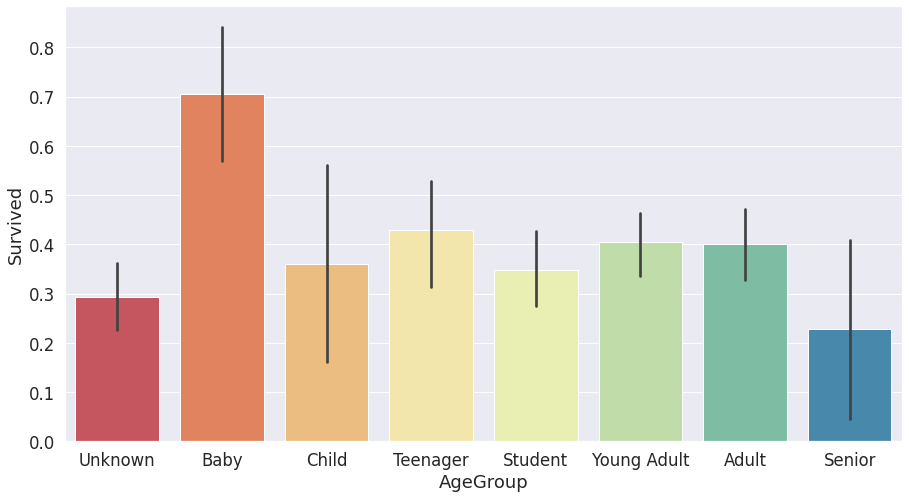

In [23]:
# Draw a bar plot of the survival using the age as a factor
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.barplot(x='AgeGroup', y='Survived', data=data_titanic_train, palette='Spectral')

###VI.What percentage of cabin numbers that were recorded

In [24]:
#Setting the cabin values as integers
data_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [25]:
#Replace all non-nan entries with 1 and the nan values with 0 into a new column CabinBool 
data_titanic_train['CabinBool'] = (data_titanic_train['Cabin'].notnull().astype('int'))
data_titanic_test['CabinBool'] = (data_titanic_test['Cabin'].notnull().astype('int'))

In [26]:
# Printing the percentage of CabinBool=0 that survived
CabinBool0_survived = data_titanic_train['Survived'][data_titanic_train['CabinBool']==0].value_counts(normalize=True)[1]
CabinBool0_survived = round(CabinBool0_survived,2)
print('Survival rate of CabinBool:0 is', CabinBool0_survived)

Survival rate of CabinBool:0 is 0.3


In [27]:
# Printing the percentage of CabinBool=1 that survived
CabinBool1_survived = data_titanic_train['Survived'][data_titanic_train['CabinBool']==1].value_counts(normalize=True)[1]
CabinBool1_survived = round(CabinBool1_survived,2)
print('Survival rate of CabinBool:1 is', CabinBool1_survived)

Survival rate of CabinBool:1 is 0.67


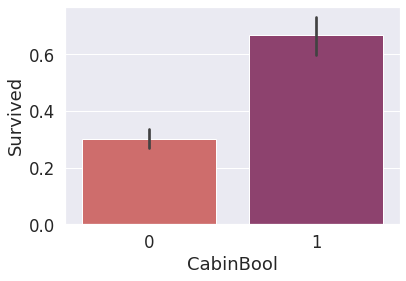

In [28]:
#Draw a bar plot of the survival using the CabinBool as a factor
sns.barplot(x='CabinBool', y='Survived', data=data_titanic_train, palette='flare')
plt.show()

##Data Pre-Processing

###Removing irrelevant columns

In [29]:
#Removing Cabin as we alr have CabinBool which is enough
data_titanic_train = data_titanic_train.drop(['Cabin'], axis=1)
data_titanic_test = data_titanic_test.drop(['Cabin'], axis=1)

In [30]:
#Removing irrelevant column: Ticket
data_titanic_train = data_titanic_train.drop(['Ticket'], axis=1)
data_titanic_test = data_titanic_test.drop(['Ticket'], axis=1)

In [31]:
#Using .columns to find out if the irrelevant columns has been dropped properly
data_titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'AgeGroup', 'CabinBool'],
      dtype='object')

In [32]:
#Using .columns to find out if the irrelevant columns has been dropped properly
data_titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup', 'CabinBool'],
      dtype='object')

###Handling missing data

In [33]:
#Checking if there are any more null values
data_titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
AgeGroup       0
CabinBool      0
dtype: int64

In [34]:
# Now we need to fill in the missing values in the Embarked feature
# Find out which group is the most popular
print('Number of people embarking in Southampton (S):')
southampton = data_titanic_train[data_titanic_train['Embarked']=='S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C):')
cherbourg = data_titanic_train[data_titanic_train['Embarked']=='C'].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q):')
queenstown = data_titanic_train[data_titanic_train['Embarked']=='Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [35]:
#Replacing the missing values in the Embarked feature with S(most popular)
data_titanic_train = data_titanic_train.fillna({'Embarked': 'S'})

In [36]:
#Checking for null values
data_titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
CabinBool      0
dtype: int64

In [37]:
#Checking if the null values have been allocated properly
print('Number of people embarking in Southampton (S):')
southampton = data_titanic_train[data_titanic_train['Embarked']=='S'].shape[0]
print(southampton)

Number of people embarking in Southampton (S):
646


###Using title to fill missing Age

In [38]:
#Create a combined group of both datasets -> This is a list
data_titanic_combine = [data_titanic_train, data_titanic_test]

In [39]:
#Using the obtained list to extract a title for each Name in the train and test datasets
for dataset in data_titanic_combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#Computes a frequency table between the titles based on gender
pd.crosstab(data_titanic_train['Title'], data_titanic_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [40]:
#Replace various titles with more common names using .replace() -> Dependent on the frequency table printed above
for dataset in data_titanic_combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Johnkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace(['Countress', 'Lady', 'Sir'], 'Royal')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
#Checking which 'title' survived better in the tragic event using groupby and finding average for each category
data_titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Countess,1.000000
1,Jonkheer,0.000000
2,Master,0.575000
3,Miss,0.702703
4,Mr,0.156673
5,Mrs,0.793651
6,Rare,0.300000
7,Royal,1.000000


In [41]:
# Map each of the title groups to a numeric value to be used in the ML models later
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal':5, 'Rare': 6}
for dataset in data_titanic_combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

####Predict the missing Age values from the most common age for their Title.

In [42]:
# Filling the missing age with mode age group for each title
# mode => Gets the mode(s) of each element along the selected axis.
mr_age = data_titanic_train[data_titanic_train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = data_titanic_train[data_titanic_train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = data_titanic_train[data_titanic_train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = data_titanic_train[data_titanic_train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = data_titanic_train[data_titanic_train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = data_titanic_train[data_titanic_train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(data_titanic_train["AgeGroup"])):
    if data_titanic_train["AgeGroup"][x] == "Unknown":
        data_titanic_train["AgeGroup"][x] = age_title_mapping[data_titanic_train["Title"][x]]
        
for x in range(len(data_titanic_test["AgeGroup"])):
    if data_titanic_test["AgeGroup"][x] == "Unknown":
        data_titanic_test["AgeGroup"][x] = age_title_mapping[data_titanic_test["Title"][x]]

In [43]:
# Map each age value to numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
data_titanic_train['AgeGroup'] = data_titanic_train['AgeGroup'].map(age_mapping)
data_titanic_test['AgeGroup'] = data_titanic_test['AgeGroup'].map(age_mapping)

data_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,0,1.0


In [44]:
#Dropping the age feature now, as it might change
data_titanic_train = data_titanic_train.drop(['Age'], axis=1)
data_titanic_test = data_titanic_test.drop(['Age'], axis=1)

###Name Feature

In [45]:
#Drop the name feature since it does not contain anymore useful information
data_titanic_train = data_titanic_train.drop(['Name'], axis=1)
data_titanic_test = data_titanic_test.drop(['Name'], axis=1)

###Sex Feature

In [46]:
# Mapping each sex feature to a numeric value
sex_mapping = {'male':0, 'female':1}
data_titanic_train['Sex'] = data_titanic_train['Sex'].map(sex_mapping)
data_titanic_test['Sex'] = data_titanic_test['Sex'].map(sex_mapping)

In [47]:
data_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1.0
1,2,1,1,1,1,0,71.2833,C,6.0,1,3.0
2,3,1,3,1,0,0,7.9250,S,5.0,0,2.0
3,4,1,1,1,1,0,53.1000,S,5.0,1,3.0
4,5,0,3,0,0,0,8.0500,S,5.0,0,1.0


###Embarked

In [48]:
#Map each embarked value to a numeric value
embark_mapping = {'S':1, 'C': 2, 'Q': 3}
data_titanic_train['Embarked'] = data_titanic_train['Embarked'].map(embark_mapping)
data_titanic_test['Embarked'] = data_titanic_test['Embarked'].map(embark_mapping)

In [49]:
data_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1.0
1,2,1,1,1,1,0,71.2833,2,6.0,1,3.0
2,3,1,3,1,0,0,7.9250,1,5.0,0,2.0
3,4,1,1,1,1,0,53.1000,1,5.0,1,3.0
4,5,0,3,0,0,0,8.0500,1,5.0,0,1.0


###Fare

In [50]:
#Fill the missing fare value in test set based on mean fare for that Pclass
for x in range(len(data_titanic_test['Fare'])):
  if pd.isnull(data_titanic_test['Fare'][x]):
    pclass = data_titanic_test['Pclass'][x] #Pclass = 3
    data_titanic_test['Fare'][x] = round(data_titanic_train[data_titanic_train['Pclass']==pclass]['Fare'].mean(),4)

#Map Fare values into groups of numerical values
data_titanic_train['FareBand'] = pd.qcut(data_titanic_train['Fare'], 4, labels=[1,2,3,4])
data_titanic_test['FareBand'] = pd.qcut(data_titanic_test['Fare'], 4, labels=[1,2,3,4])

#Drap Fare Values
data_titanic_train = data_titanic_train.drop(['Fare'], axis = 1)
data_titanic_test = data_titanic_test.drop(['Fare'], axis = 1)

<ipython-input-50-ce576d1e9e06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_titanic_test['Fare'][x] = round(data_titanic_train[data_titanic_train['Pclass']==pclass]['Fare'].mean(),4)


In [51]:
data_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1.0,1
1,2,1,1,1,1,0,2,6.0,1,3.0,4
2,3,1,3,1,0,0,1,5.0,0,2.0,2
3,4,1,1,1,1,0,1,5.0,1,3.0,4
4,5,0,3,0,0,0,1,5.0,0,1.0,2


In [52]:
data_titanic_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


##ML Model

###Split the dataset into training and testing set using train_test_split
Hints for features and targets
* Hint: Drop survived and passenger id columns from the processed data for the features 
* Target: Survived

In [53]:
# Dropping irrelevant data columns from features 
features = data_titanic_train.drop(['Survived', 'PassengerId'], axis=1)
##setting variable target to be the intended target of ML model
target = data_titanic_train['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.33, random_state=0) 

### ML models

####KNN

In [54]:
#set a variable for the KNN classification model 
knn = KNeighborsClassifier()
#Fit the train set into the model 
knn.fit(X_train, Y_train)
#Make a prediction(predicted y value)
y_pred = knn.predict(X_test)
#Find the accuracy of this model
accuracy_knn = round(metrics.accuracy_score(Y_test, y_pred)*100, 2)
print("Accuracy of KNN is", accuracy_knn)

Accuracy of KNN is 80.68
